In [17]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..//")
import farField.farField as ff

In [18]:
data0 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Cuppoletti Lab" \
            "\\NearFieldAcousticDuctedRotor\\slade mic data\\20220725\\ducted\\tm0.50" \
            "\\mic6inplane\\"

micData = ff.micData(data0, 204800, 5)

In [19]:
corfac = np.array([0.9964, 0.9945, 0.99894, 0.99841, 1.00117, 0.99957, 0.99798, 0.9902])
micData.dataProcess(corfac)

In [20]:
spl0, freq0 = micData.narrowband(0)
spl6, freq6 = micData.narrowband(6)
spl12, freq12 = micData.narrowband(12)

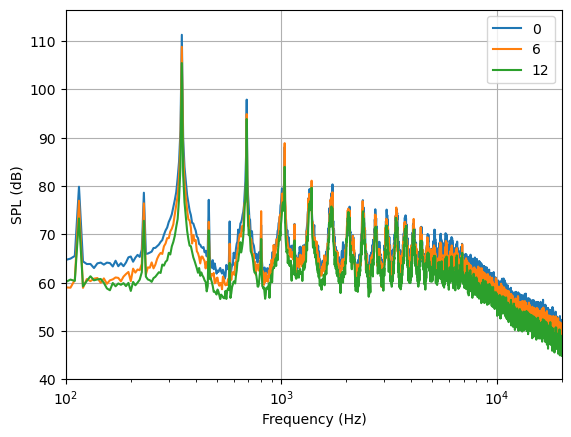

In [26]:
plt.plot(freq0, spl0[6], label="0")
plt.plot(freq6, spl6[6], label="6")
plt.plot(freq12, spl12[6], label="12")
plt.xscale("log")
plt.legend()
plt.xlim([100, 20000])
plt.ylim(40)
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.ylabel("SPL (dB)")
plt.show()

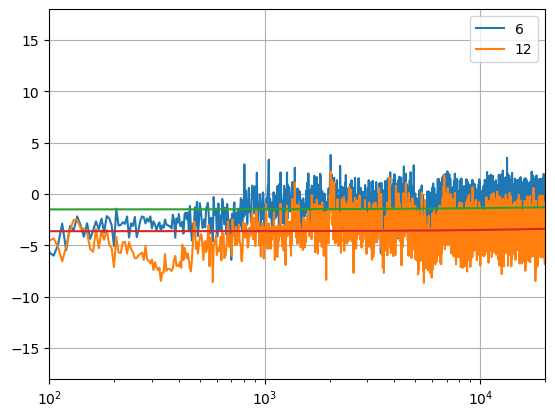

In [42]:
m6 = spl6[6] - spl0[6]
m12 = spl12[6] - spl0[6]
plt.plot(freq6, m6, label="6")
plt.plot(freq12, m12, label="12")
d6, a6, b6, c6 = np.polyfit(freq6, m6, 3)
d12, a12, b12, c12 = np.polyfit(freq12, m12, 3)
plt.plot(freq6, d6*freq6**3+a6*freq6**2+b6*freq6+c6)
plt.plot(freq12, d12*freq12**3+a12*freq12**2+b12*freq6+c12)
plt.xscale("log")
plt.xlim([100, 20000])
plt.legend()
plt.ylim([-18, 18])
plt.grid()
plt.show()